<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/Bank_Note_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Note Analysis

## **Data Set Information:**

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

### **Attribute Information**:

variance of Wavelet Transformed image (continuous)
skewness of Wavelet Transformed image (continuous)
curtosis of Wavelet Transformed image (continuous)
entropy of image (continuous)
class (integer)

Dataset: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

UCI: http://archive.ics.uci.edu/ml/datasets/banknote+authentication

## **Task: Classify a Bank Note as Fake or Real**

## **Exploratory Data Analysis**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


In [5]:
df=pd.read_csv('BankNote_Authentication.csv')   

In [6]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df.shape

(1372, 5)

In [8]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [9]:
#Find if any invalid observations exist
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [10]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

# **Data Visualization**

## **Univariate Data Analysis**

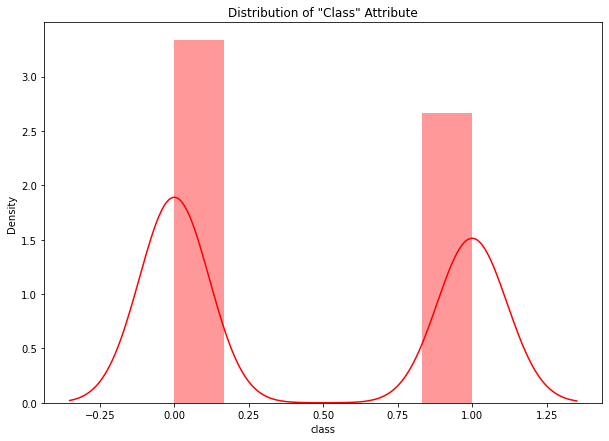

In [11]:
import warnings

warnings.filterwarnings('ignore')
plt.figure(figsize=(10,7))
plt.title('Distribution of "Class" Attribute')

sns.distplot(df['class'],color='red')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feeb829c6d0>,
      dtype=object)

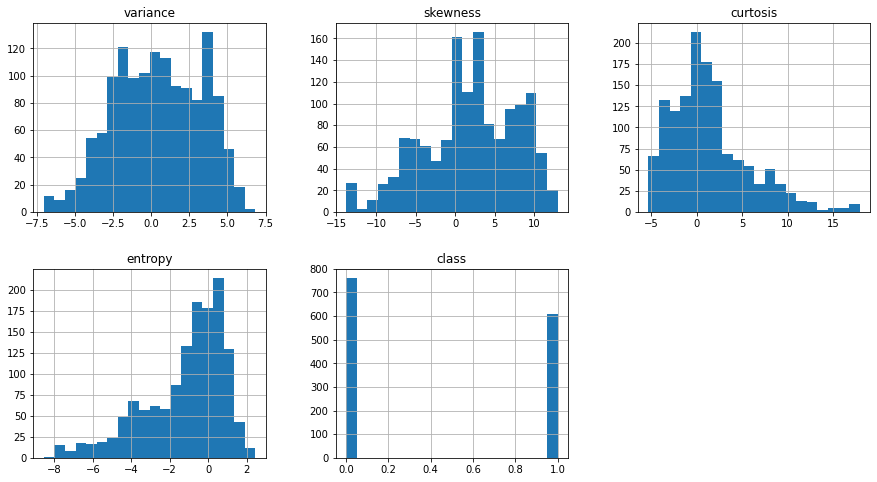

In [12]:
df.hist(bins=20, figsize=(15,8),layout=(2,3))

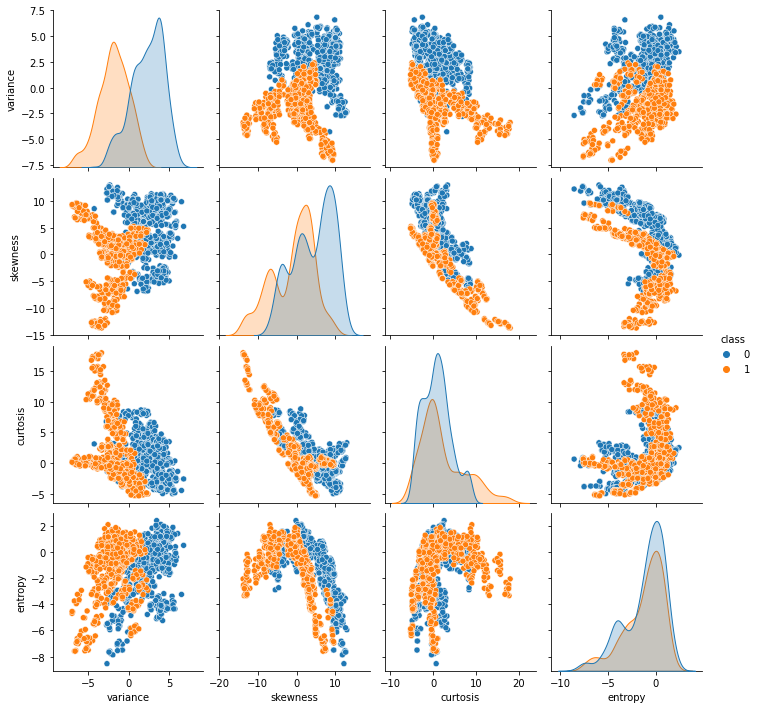

In [13]:
sns.pairplot(df,hue='class')

## **Prepare Data for Model Building**

In [14]:
#defining features and target variable
X = df.drop(['class'],axis=1) 
y = df['class']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.20)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[-0.57169782, -0.00283043, -0.65029578, -0.12482005],
       [-0.897233  , -0.10912767, -0.29013399,  0.01551943],
       [-0.4213387 , -1.27523607,  0.61139311,  0.9818071 ],
       ...,
       [ 1.53909582, -0.02666011, -0.34552829,  1.26752587],
       [-0.5111522 ,  0.14329177, -1.06226201, -0.09162511],
       [ 0.30940315, -1.07970206,  1.55470733, -0.29651299]])

In [21]:
y_train.head()

1245    1
1057    1
1038    1
869     1
701     0
Name: class, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

classifier1=LogisticRegression(solver='liblinear',random_state=1)
classifier1.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
accuracies=cross_val_score(estimator=classifier1,X=X_train,y=y_train,cv=10)

In [28]:
print("Accuracies:\n",accuracies)

y_test_pred=classifier1.predict(X_test)


print("Mean Accuracy: ",accuracies.mean())

Accuracies:
 [0.97272727 0.99090909 0.99090909 0.97272727 0.98181818 0.99090909
 0.99090909 0.99082569 0.98165138 0.98165138]
Mean Accuracy:  0.9845037531276064
